In [1]:
%reload_kedro

2023-05-08 18:43:44,799 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/gpalazzo/Desktop/dev/crypto_msc_thesis
2023-05-08 18:43:45,465 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-05-08 18:43:45,629 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-05-08 18:43:45,630 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import seaborn as sns

## XGBoost

### Operations Profit over Time

In [4]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

2023-05-08 18:43:46,507 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [5]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

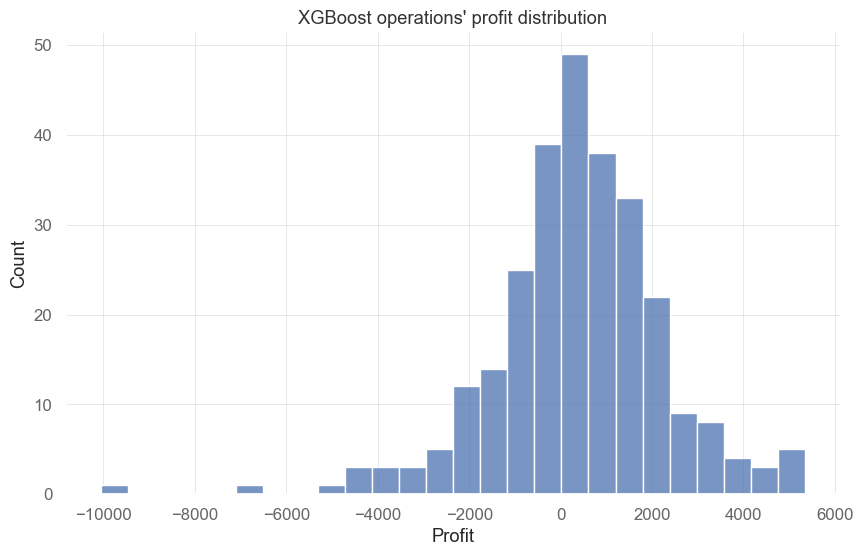

In [6]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="XGBoost operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_xgboost_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

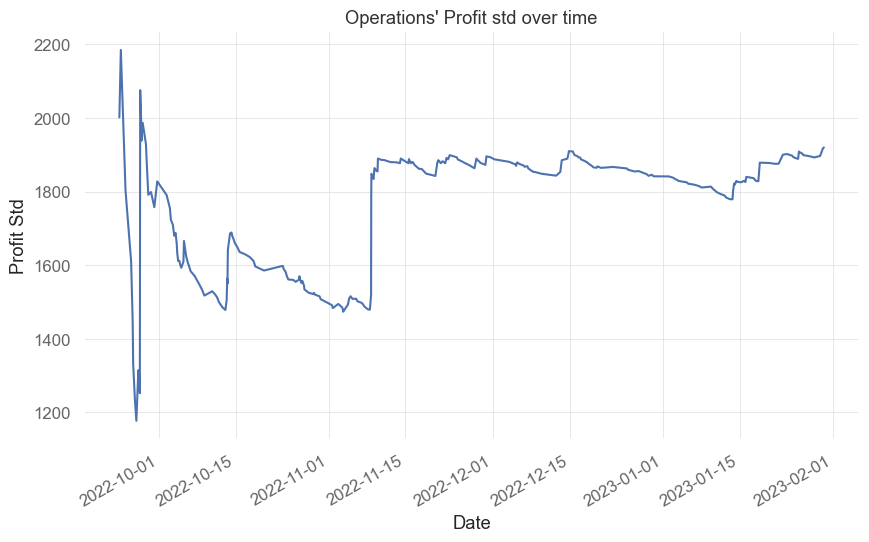

In [7]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

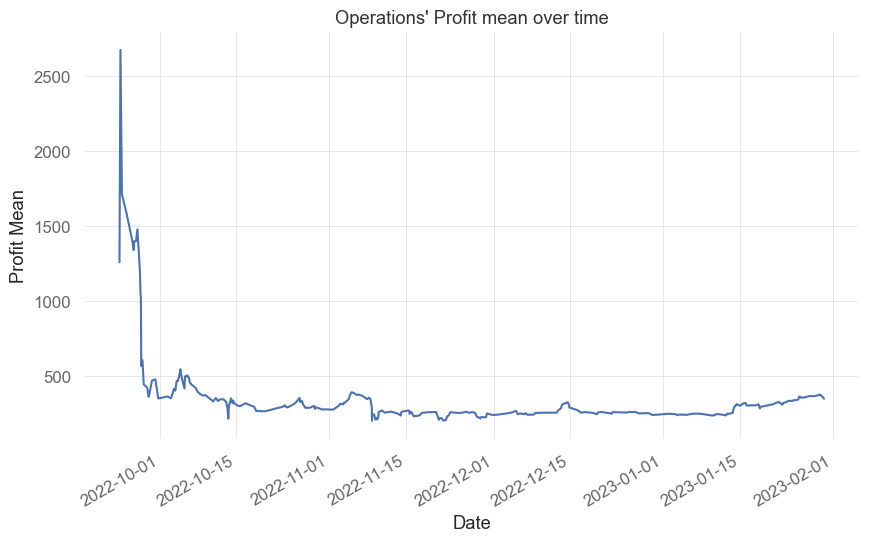

In [8]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LSTM

### Operations Profit over Time

In [9]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

2023-05-08 18:43:48,018 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [10]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

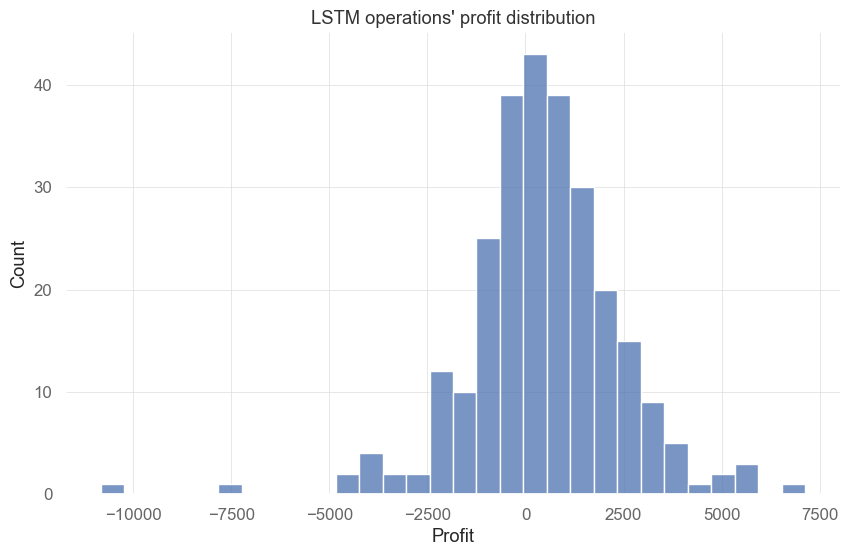

In [11]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LSTM operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_lstm_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

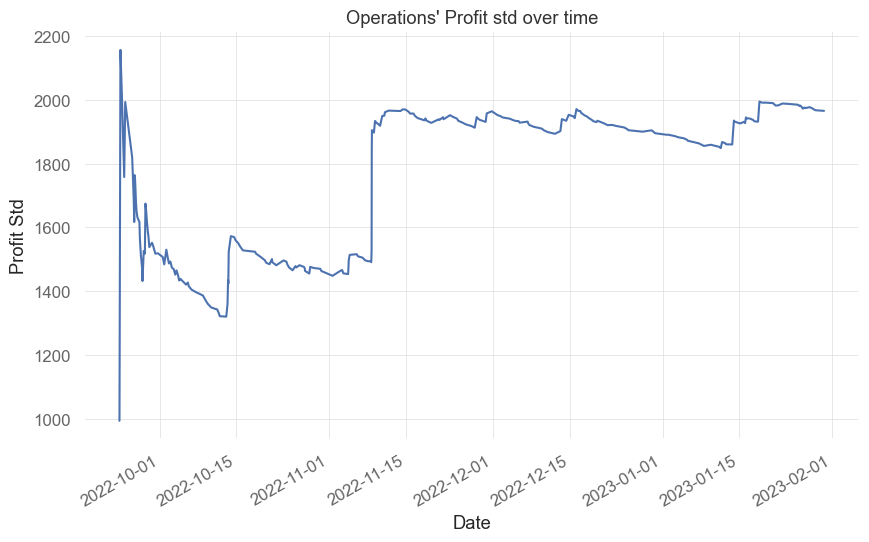

In [12]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

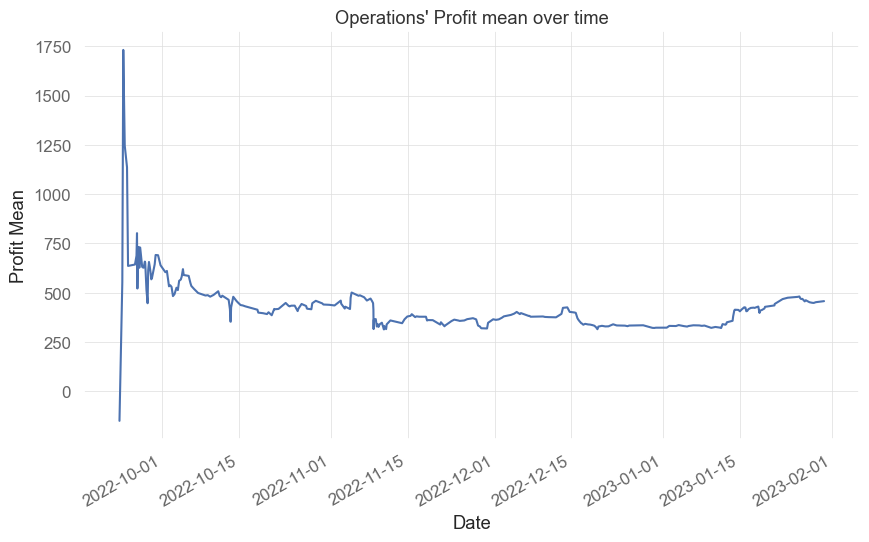

In [13]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LogReg

### Operations Profit over Time

In [14]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

2023-05-08 18:43:49,592 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [15]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

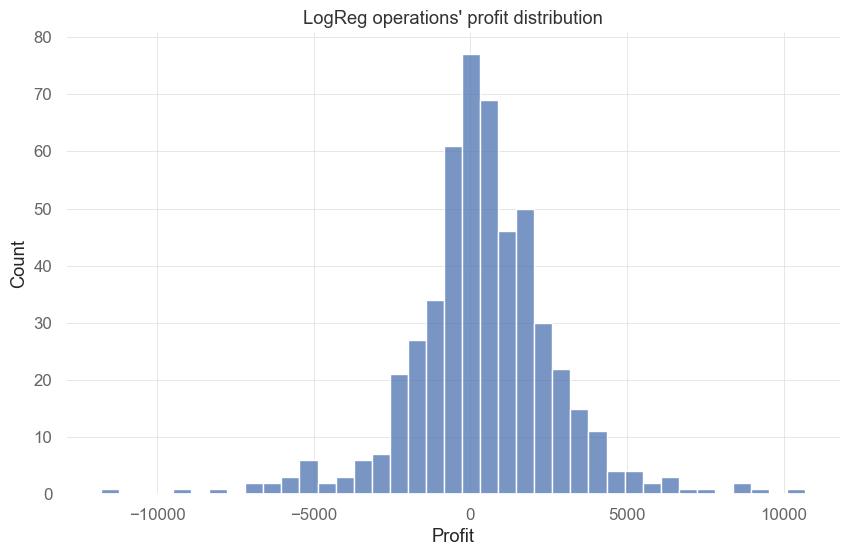

In [16]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LogReg operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_logreg_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

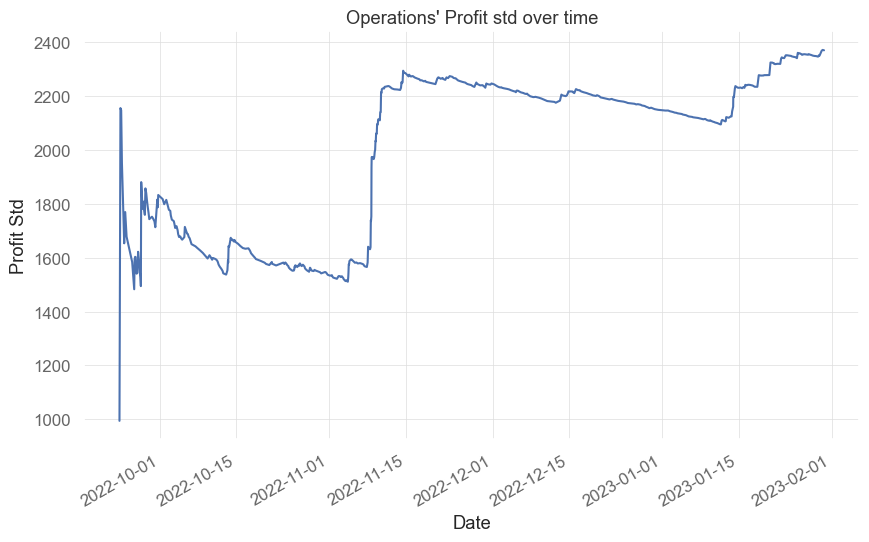

In [17]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

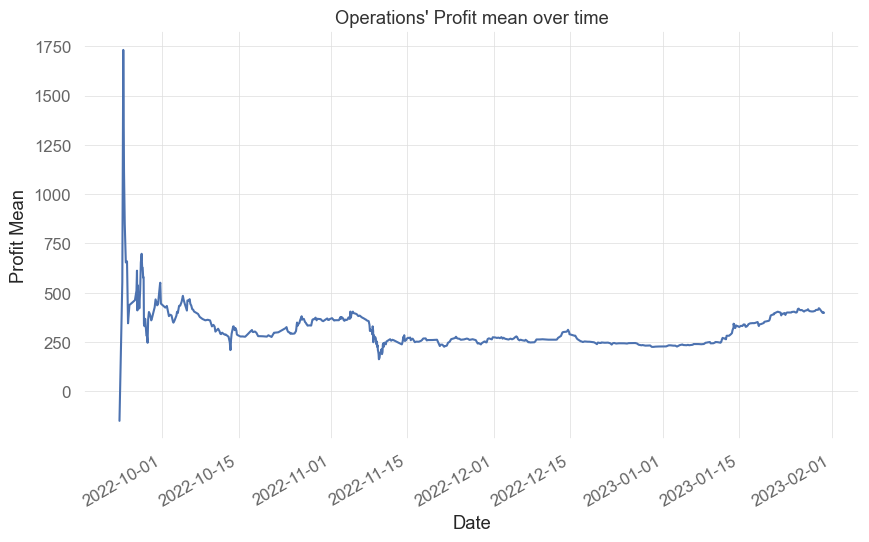

In [18]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## Benchmark

In [19]:
df_portf_pnl_benchmark = catalog.load("benchmark_trendfollowing_pnl")

df_portf_pnl_benchmark.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl_benchmark["pctchg_pos"])

df_portf_pnl_benchmark = df_portf_pnl_benchmark[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_portf_pnl_benchmark.loc[:, "logret_accum"] = df_portf_pnl_benchmark["logret_pos"].cumsum()
df_portf_pnl_benchmark.loc[:, "pctchg_accum"] = np.exp(df_portf_pnl_benchmark["logret_accum"]) - 1

df_portf_pnl_benchmark = df_portf_pnl_benchmark[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos_benchmark",
                                   "pctchg_accum": "portf_pctchg_accum_benchmark"})

df_portf_pnl_benchmark.index = pd.to_datetime(df_portf_pnl_benchmark.index)

2023-05-08 18:43:51,034 - kedro.io.data_catalog - INFO - Loading data from `benchmark_trendfollowing_pnl` (ParquetDataSet)...


## XGBoost

### Portfolio overall metrics - Part 1

In [20]:
df_portf_metr = catalog.load("xgboost_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "xgboost"
df_portf_metr

2023-05-08 18:43:51,047 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,96981.92327,10,7,xgboost


### Portfolio overall metrics - Part 2

In [21]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

xgboost = df_logret.copy()

2023-05-08 18:43:51,063 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [22]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   64.66%
CAGR﹪              314.55%

Sharpe              3.48
Prob. Sharpe Ratio  99.77%
Sortino             5.26
Sortino/√2          3.72
Omega               1.66

Max Drawdown        -9.05%
Longest DD Days     29

Gain/Pain Ratio     1.26
Gain/Pain (1M)      -

Payoff Ratio        1.04
Profit Factor       1.66
Common Sense Ratio  1.99
CPC Index           1.06
Tail Ratio          1.2
Outlier Win Ratio   3.52
Outlier Loss Ratio  3.46

MTD                 22.36%
3M                  40.6%
6M                  64.66%
YTD                 22.36%
1Y                  64.66%
3Y (ann.)           314.55%
5Y (ann.)           314.55%
10Y (ann.)          314.55%
All-time (ann.)     314.55%

Avg. Drawdown       -2.13%
Avg. Drawdown Days  4
Recovery Factor     7.14
Ulcer Index         0.03
Serenity Index      5.

## LSTM

### Portfolio overall metrics - Part 1

In [23]:
df_portf_metr = catalog.load("lstm_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "lstm"
df_portf_metr

2023-05-08 18:43:51,497 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,121792.874717,13,5,lstm


### Portfolio overall metrics - Part 2

In [24]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

lstm = df_logret.copy()

2023-05-08 18:43:51,509 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [25]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   81.2%
CAGR﹪              437.55%

Sharpe              4.46
Prob. Sharpe Ratio  99.98%
Sortino             7.14
Sortino/√2          5.05
Omega               1.95

Max Drawdown        -8.03%
Longest DD Days     28

Gain/Pain Ratio     2.08
Gain/Pain (1M)      -

Payoff Ratio        1.15
Profit Factor       1.95
Common Sense Ratio  2.61
CPC Index           1.41
Tail Ratio          1.34
Outlier Win Ratio   3.68
Outlier Loss Ratio  3.3

MTD                 25.48%
3M                  41.91%
6M                  81.2%
YTD                 25.48%
1Y                  81.2%
3Y (ann.)           437.55%
5Y (ann.)           437.55%
10Y (ann.)          437.55%
All-time (ann.)     437.55%

Avg. Drawdown       -1.55%
Avg. Drawdown Days  3
Recovery Factor     10.11
Ulcer Index         0.02
Serenity Index      8.2

## LogReg

### Portfolio overall metrics - Part 1

In [26]:
df_portf_metr = catalog.load("logreg_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "LogReg"
df_portf_metr

2023-05-08 18:43:51,871 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,205685.059227,13,5,LogReg


### Portfolio overall metrics - Part 2

In [27]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

logreg = df_logret.copy()

2023-05-08 18:43:51,883 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [28]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   137.12%
CAGR﹪              1050.74%

Sharpe              3.18
Prob. Sharpe Ratio  99.99%
Sortino             4.97
Sortino/√2          3.51
Omega               1.6

Max Drawdown        -17.55%
Longest DD Days     28

Gain/Pain Ratio     1.79
Gain/Pain (1M)      -

Payoff Ratio        1.08
Profit Factor       1.6
Common Sense Ratio  1.97
CPC Index           1.03
Tail Ratio          1.23
Outlier Win Ratio   3.69
Outlier Loss Ratio  3.94

MTD                 47.6%
3M                  71.22%
6M                  137.12%
YTD                 47.6%
1Y                  137.12%
3Y (ann.)           1050.74%
5Y (ann.)           1050.74%
10Y (ann.)          1050.74%
All-time (ann.)     1050.74%

Avg. Drawdown       -2.14%
Avg. Drawdown Days  2
Recovery Factor     7.81
Ulcer Index         0.04
Serenity Index 

## Cumulative Returns

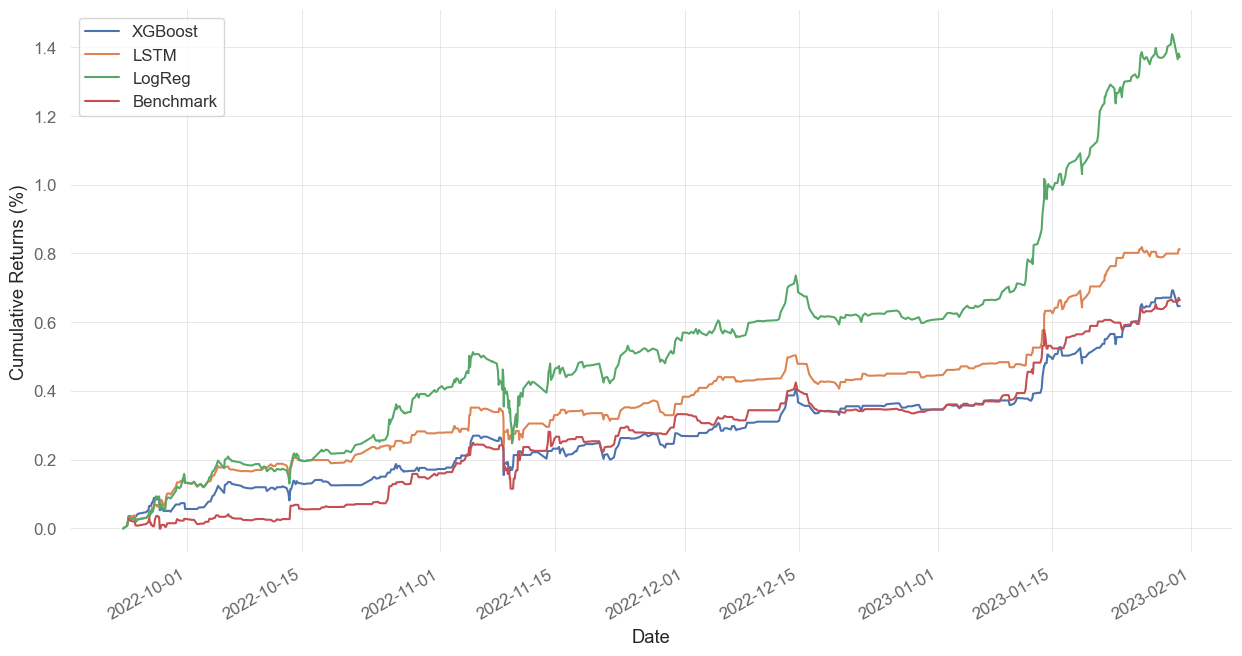

In [29]:
df = xgboost[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "XGBoost"}) \
        .merge(lstm[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "LSTM"}), 
               left_index=True, 
               right_index=True, 
               how="outer") \
        .merge(logreg[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "LogReg"}), 
               left_index=True, 
               right_index=True, 
               how="outer") \
        .merge(df_portf_pnl_benchmark[["portf_pctchg_accum_benchmark"]] \
                       .rename(columns={"portf_pctchg_accum_benchmark": "Benchmark"}), 
               left_index=True, 
               right_index=True, 
               how="outer")

plot = df.ffill().plot(figsize=(15, 8))

plt.xlabel("Date")
plt.ylabel("Cumulative Returns (%)")

fig = plot.get_figure()
fig.savefig("/Users/gpalazzo/Desktop/fig_portfolios_vs_benchmk_rets.png")